In [9]:
%cd C:\Users\Viacheslav_Bobrov\AI\BCI\signal_processing_courses\analyzing_neural_time_series
# % dir
import scipy.io

data = scipy.io.loadmat('sampleEEGdata')
EEGdata = data["EEG"][0, 0]["data"]  # data array, shape=(n_channels, n_points, n_trials)
EEGpnts = data["EEG"][0, 0]["pnts"][0, 0]  # number of points in EEG data
EEGtimes = data["EEG"][0, 0]["times"][0]  # time array, shape=(n_points)
EEGsrate = float(data["EEG"][0, 0]["srate"][0])  # sampling frequency
EEGtrials = data["EEG"][0, 0]["trials"][0, 0] # n_trials
EEGepoch = data["EEG"][0, 0]["epoch"][0]

which_channel_to_plot = 'FCz'
EEGchanlocslabels=data["EEG"][0,0]["chanlocs"][0]["labels"]
channel_index = EEGchanlocslabels  == which_channel_to_plot # chanell mask of [ 0 0 0 0 0 1 0 0 0 ]

EEGdata.shape

C:\Users\Viacheslav_Bobrov\AI\BCI\signal_processing_courses\analyzing_neural_time_series


(64, 640, 99)

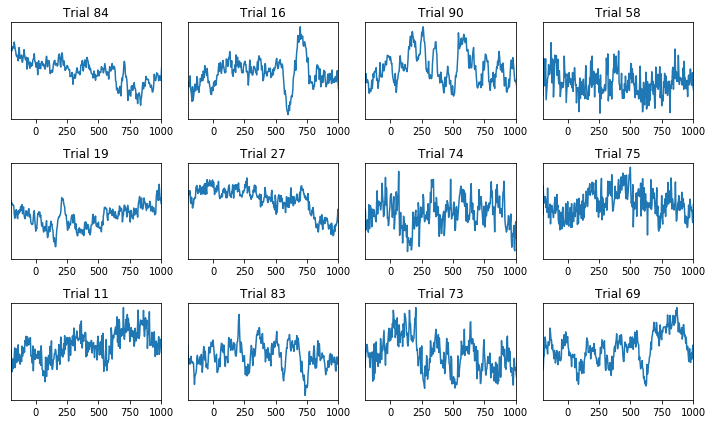

In [13]:
from matplotlib import pyplot as plt
import numpy as np
import random

x_axis_limit = [-200, 1000]  #in milliseconds

num_trials2plot = 12

plt.figure(figsize=(10, 6))

#pick a random trials using random.choice (from numpy.random)
random_trial_to_plot = random.sample(range(EEGtrials), num_trials2plot)

for ii in range(num_trials2plot):

    #figure out how many subplots we need
    plt.subplot(np.ceil(num_trials2plot / np.ceil(np.sqrt(num_trials2plot))), np.ceil(np.sqrt(num_trials2plot)), ii + 1)

    #plot trial and specify x-axis and title
    plt.plot(EEGtimes, np.squeeze(EEGdata[channel_index, :, random_trial_to_plot[ii] - 1]))
    plt.title("Trial " + str(random_trial_to_plot[ii]))
    plt.yticks([])
    plt.xlim(x_axis_limit)
    plt.tight_layout()


Text(0.5, 1.0, 'All EEG traces, and their average')

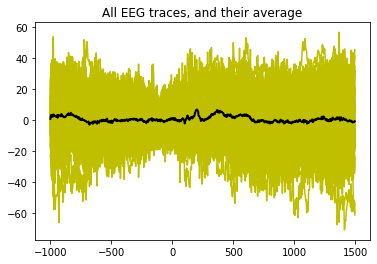

In [14]:
#plot all trials
plt.plot(EEGtimes, np.squeeze(EEGdata[channel_index, :, :]), 'y')

#plot the event-related potential (ERP), i.e. the average time-domain signal
plt.plot(EEGtimes, np.squeeze(np.mean(EEGdata[channel_index, :, :], axis=2)), 'k', linewidth=2)
plt.title("All EEG traces, and their average")


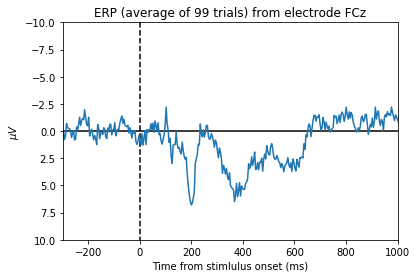

In [15]:
#now plot only the ERP
plt.plot(EEGtimes, np.squeeze(
    np.mean(EEGdata[channel_index, :, :], axis=2)))  #axis=2 specifies which axis to compute the mean along
plt.vlines(0, -10, 10, linestyles='dashed')
plt.hlines(0, -1000, 1500)

plt.axis([-300, 1000, -10, 10])
plt.xlabel("Time from stimlulus onset (ms)")
plt.ylabel(r'$ \mu V $')  #latex interpreter looks for dollar signs
plt.title("ERP (average of " + str(EEGtrials) + " trials) from electrode " + EEGchanlocslabels[channel_index][0][0])
plt.gca().invert_yaxis()  #EEG convention to flip y axis
